In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from IPython.display import display


# Load data
file_bb = r"D:\CAP_END\MODEL_BB_LOCATION_V1\metrics\20250423_104041\all_metrics_summary.csv"
file_ud = r"D:\CAP_END\MODEL_UD_LOCATION_V1\metrics\20250423_192548\all_metrics_summary.csv"
df_bb = pd.read_csv(file_bb)
df_ud = pd.read_csv(file_ud)

desc_bb = df_bb.describe()
desc_ud = df_ud.describe()

unique_bb = df_bb[['Ticker', 'Model', 'Dataset']].nunique()
unique_ud = df_ud[['Ticker', 'Model', 'Dataset']].nunique()

grouped_bb = df_bb.groupby('Dataset')[['Accuracy', 'Precision', 'Recall', 'F1']].mean()
grouped_ud = df_ud.groupby('Dataset')[['Accuracy', 'Precision', 'Recall', 'F1']].mean()

describe_by_dataset_bb = df_bb.groupby('Dataset')[['Accuracy', 'Precision', 'Recall', 'F1']].describe()
describe_by_dataset_ud = df_ud.groupby('Dataset')[['Accuracy', 'Precision', 'Recall', 'F1']].describe()

C:\Users\A-Q-HNB\AppData\Local\Temp\ipykernel_27092\3904017130.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
print("=== BB STATISTICS DESCRIPTION BY DATASET ===")
for dataset_name, subset in df_bb.groupby('Dataset'):
    print(f"\n--- Dataset: {dataset_name} ---")
    stats = subset[['Accuracy', 'Precision', 'Recall', 'F1']].describe().round(4)
    display(stats)


=== BB STATISTICS DESCRIPTION BY DATASET ===

--- Dataset: test ---


,Accuracy,Precision,Recall,F1
count,2822.0000,2822.0000,2822.0000,2822.0000
mean,0.5731,0.5517,0.5731,0.5228
std,0.3194,0.3662,0.3194,0.3419
min,0.0000,0.0000,0.0000,0.0000
25%,0.3448,0.1712,0.3448,0.2086
50%,0.5894,0.6290,0.5894,0.5310
75%,0.8966,0.9322,0.8966,0.8744
max,1.0000,1.0000,1.0000,1.0000



--- Dataset: train ---


,Accuracy,Precision,Recall,F1
count,2822.0000,2822.0000,2822.0000,2822.0000
mean,0.8442,0.8372,0.8442,0.8258
std,0.1566,0.1910,0.1566,0.1882
min,0.0548,0.0030,0.0548,0.0057
25%,0.7966,0.8047,0.7966,0.7932
50%,0.8911,0.8936,0.8911,0.8847
75%,0.9512,0.9530,0.9512,0.9509
max,1.0000,1.0000,1.0000,1.0000



--- Dataset: valid ---


,Accuracy,Precision,Recall,F1
count,2822.0000,2822.0000,2822.0000,2822.0000
mean,0.6620,0.6678,0.6620,0.6277
std,0.2767,0.3297,0.2767,0.3061
min,0.0000,0.0000,0.0000,0.0000
25%,0.4839,0.4162,0.4839,0.4072
50%,0.7097,0.7924,0.7097,0.6757
75%,0.9032,0.9694,0.9032,0.9043
max,1.0000,1.0000,1.0000,1.0000


In [11]:
print("\n=== UD STATISTICS DESCRIPTION BY DATASET ===")
for dataset_name, subset in df_ud.groupby('Dataset'):
    print(f"\n--- Dataset: {dataset_name} ---")
    stats = subset[['Accuracy', 'Precision', 'Recall', 'F1']].describe().round(4)
    display(stats)



=== UD STATISTICS DESCRIPTION BY DATASET ===

--- Dataset: test ---


,Accuracy,Precision,Recall,F1
count,2860.0000,2860.0000,2860.0000,2860.0000
mean,0.5626,0.5010,0.5686,0.5000
std,0.1621,0.2950,0.3855,0.3124
min,0.0488,0.0000,0.0000,0.0000
25%,0.4634,0.3750,0.1765,0.2500
50%,0.5366,0.5366,0.6306,0.5660
75%,0.6341,0.6970,1.0000,0.7333
max,0.9756,1.0000,1.0000,0.9873



--- Dataset: train ---


,Accuracy,Precision,Recall,F1
count,2860.0000,2860.0000,2860.0000,2860.0000
mean,0.7200,0.7215,0.6937,0.6928
std,0.1602,0.1890,0.2450,0.2200
min,0.3493,0.0000,0.0000,0.0000
25%,0.5830,0.5994,0.5632,0.5846
50%,0.6964,0.7140,0.7269,0.6934
75%,0.8118,0.8375,0.8567,0.8115
max,1.0000,1.0000,1.0000,1.0000



--- Dataset: valid ---


,Accuracy,Precision,Recall,F1
count,2860.0000,2860.0000,2860.0000,2860.0000
mean,0.5512,0.5606,0.5558,0.5221
std,0.1445,0.2584,0.3479,0.2838
min,0.0444,0.0000,0.0000,0.0000
25%,0.4667,0.5000,0.2826,0.3662
50%,0.5333,0.5882,0.5769,0.5797
75%,0.6000,0.7000,0.8937,0.7234
max,1.0000,1.0000,1.0000,1.0000


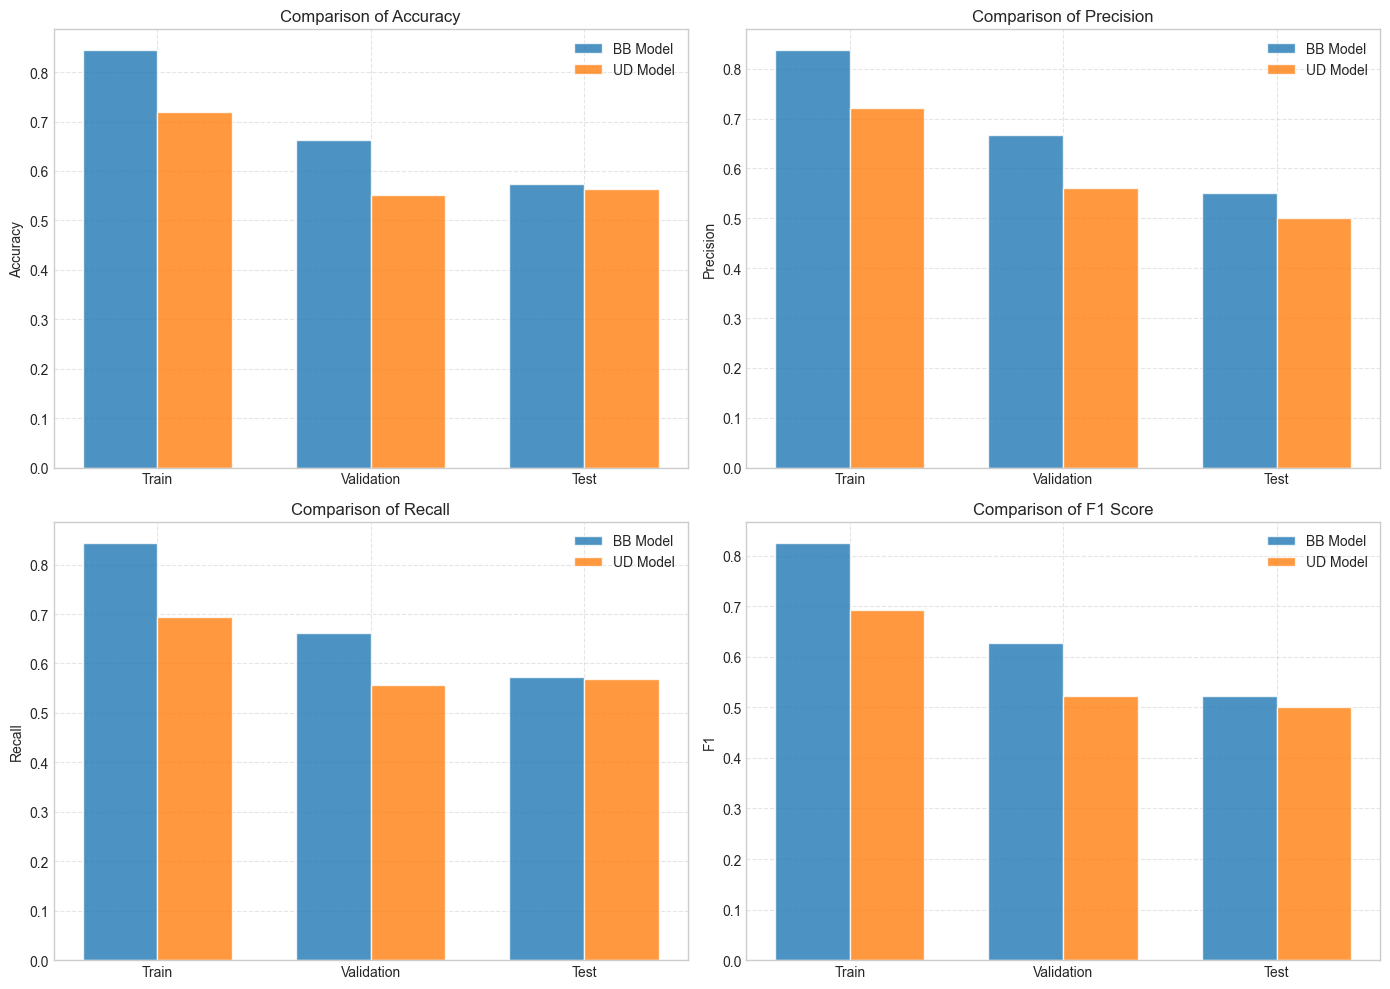

In [4]:
# Ensure dataset index is sorted correctly
ordered_datasets = ['train', 'valid', 'test']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = {'BB Model': '#1f77b4', 'UD Model': '#ff7f0e'}

for i, metric in enumerate(metrics):
    ax = axs[i // 2][i % 2]
    bb_vals = grouped_bb.loc[ordered_datasets, metric]
    ud_vals = grouped_ud.loc[ordered_datasets, metric]

    bar_width = 0.35
    x = range(len(ordered_datasets))

    ax.bar([p - bar_width/2 for p in x], bb_vals, width=bar_width, label='BB Model', alpha=0.8, color=colors['BB Model'])
    ax.bar([p + bar_width/2 for p in x], ud_vals, width=bar_width, label='UD Model', alpha=0.8, color=colors['UD Model'])

    ax.set_xticks(x)
    ax.set_xticklabels(['Train', 'Validation', 'Test'])
    ax.set_title(f'Comparison of {titles[i]}')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [5]:
# Hàm chọn top 20 F1 cho mỗi Dataset
def get_top_f1(df, prefix):
    top_f1 = {}
    for ds in ['train', 'valid', 'test']:
        key = f"{prefix}_{ds}"
        top_f1[key] = (
            df[df['Dataset'] == ds]
            .sort_values(by='F1', ascending=False)
            .head(20)
            .copy()
        )
    return top_f1

# Lấy top tickers theo F1 cho mỗi model
top_tickers_bb = get_top_f1(df_bb, 'BB')
top_tickers_ud = get_top_f1(df_ud, 'UD')

# Gộp các bảng top tickers BB
df_top_bb = pd.concat([
    top_tickers_bb['BB_train'].assign(Dataset='Train'),
    top_tickers_bb['BB_valid'].assign(Dataset='Valid'),
    top_tickers_bb['BB_test'].assign(Dataset='Test')
])
df_top_bb['Model_Type'] = 'BB'

# Gộp các bảng top tickers UD
df_top_ud = pd.concat([
    top_tickers_ud['UD_train'].assign(Dataset='Train'),
    top_tickers_ud['UD_valid'].assign(Dataset='Valid'),
    top_tickers_ud['UD_test'].assign(Dataset='Test')
])
df_top_ud['Model_Type'] = 'UD'

# Kết hợp cả hai
df_top_all = pd.concat([df_top_bb, df_top_ud], ignore_index=True)
df_top_all = df_top_all[['Model_Type', 'Dataset', 'Ticker', 'Model', 'F1']]

# Xuất ra file CSV
output_path = r"D:\all_metrics_summary_SVM_2\top20_f1_by_dataset_per_model.csv"
df_top_all.to_csv(output_path, index=False)

print(f"✅ Top 20 F1 scores per dataset per model exported to:\n{output_path}")


✅ Top 20 F1 scores per dataset per model exported to:
D:\all_metrics_summary_SVM_2\top20_f1_by_dataset_per_model.csv


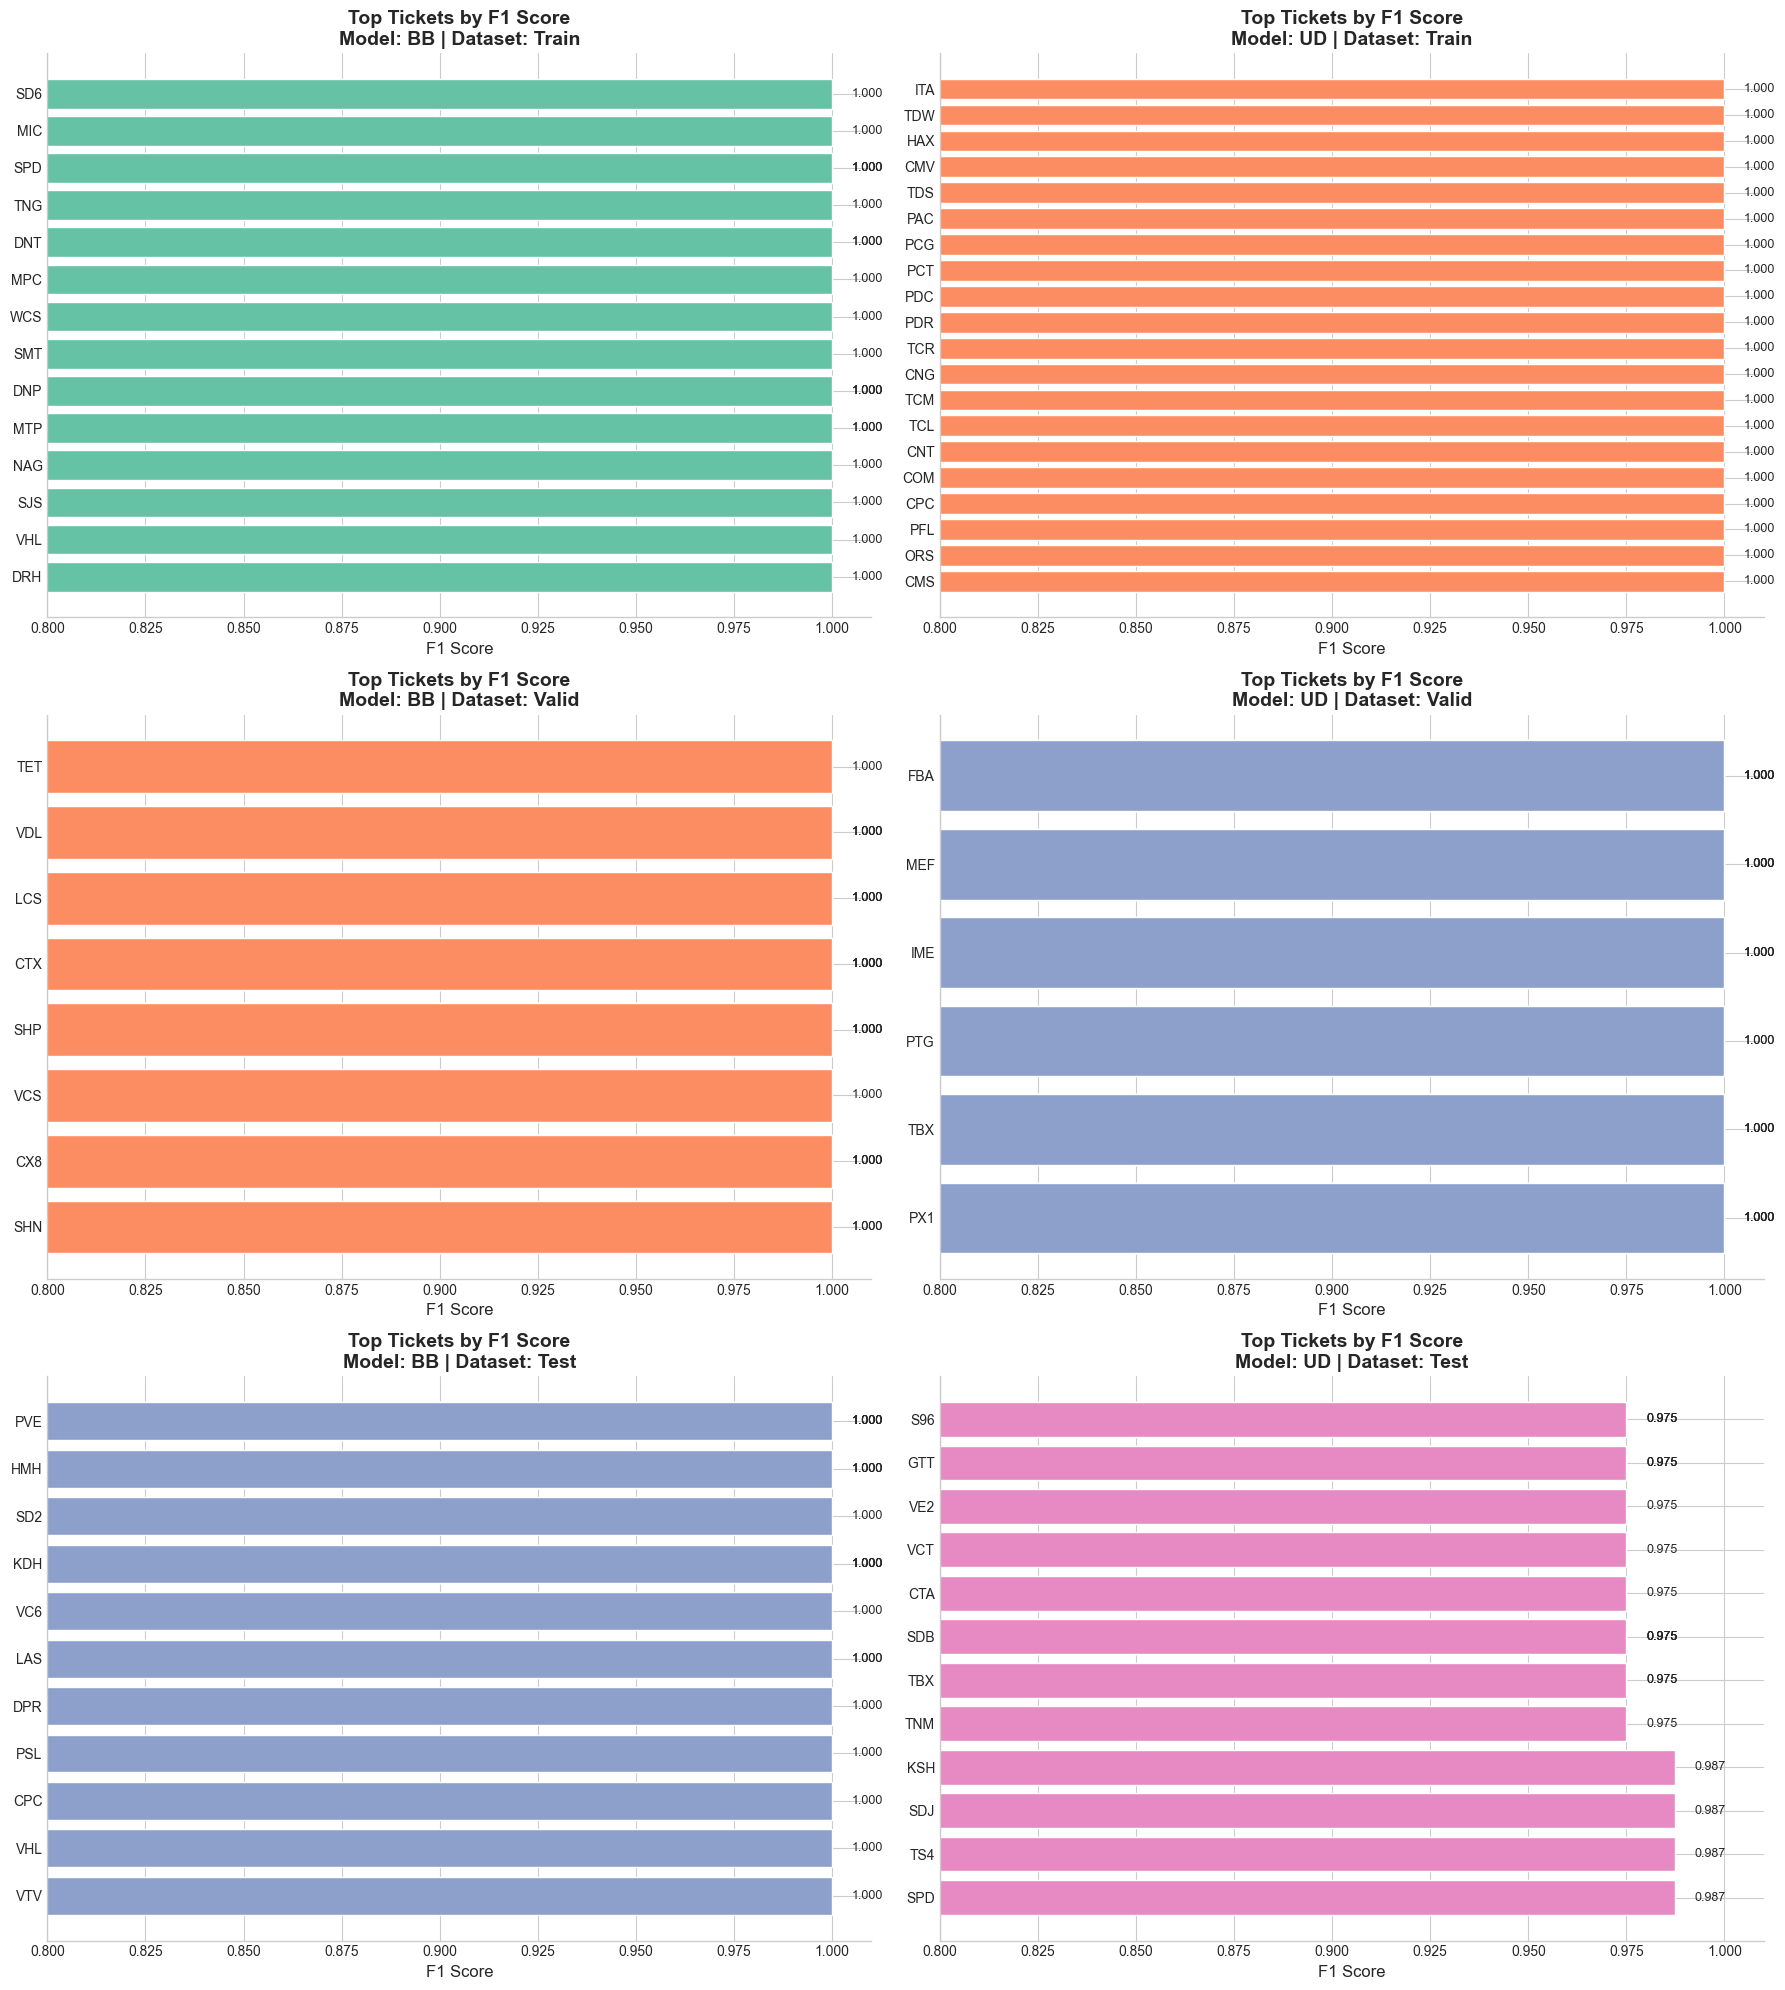

In [6]:
colors = sns.color_palette("Set2", 6)

fig, axes = plt.subplots(3, 2, figsize=(18, 20))
datasets = ['Train', 'Valid', 'Test']
model_types = ['BB', 'UD']

for i, dataset in enumerate(datasets):
    for j, model in enumerate(model_types):
        ax = axes[i][j]
        subset = df_top_all[
            (df_top_all['Dataset'] == dataset) & (df_top_all['Model_Type'] == model)
            ].sort_values(by='F1')

        bars = ax.barh(subset['Ticker'], subset['F1'], color=colors[i + j])
        ax.set_title(f'Top Tickets by F1 Score\nModel: {model} | Dataset: {dataset}',
                     fontsize=14, weight='bold')
        ax.set_xlabel('F1 Score', fontsize=12)
        ax.set_xlim(0.8, 1.01)
        ax.tick_params(axis='y', labelsize=10)
        ax.invert_yaxis()

        # Hiển thị nhãn điểm F1
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
                    f'{width:.3f}', va='center', fontsize=9)

        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


In [7]:
file_bb_pre = r"D:\CAP_END\MODEL_BB_LOCATION_V1\predictions\20250423_104041\merged_predictions.csv"
file_ud_pre = r"D:\CAP_END\MODEL_UD_LOCATION_V1\predictions\20250423_192548\merged_predictions.csv"

df_bb_pre = pd.read_csv(file_bb_pre)
df_ud_pre = pd.read_csv(file_ud_pre)

bb_model_unique_ticker_count = df_bb_pre.groupby('Model')['Ticker'].nunique().sort_values(ascending=False)
ud_model_unique_ticker_count = df_ud_pre.groupby('Model')['Ticker'].nunique().sort_values(ascending=False)

print("BB model - unique ticker count:")
print(bb_model_unique_ticker_count)

print("\nUD model - unique ticker count:")
print(ud_model_unique_ticker_count)


BB model - unique ticker count:
Model
svm                    376
logistic_regression    115
transformer            110
lstm                   106
Name: Ticker, dtype: int64

UD model - unique ticker count:
Model
svm                    464
logistic_regression     99
lstm                    78
transformer             74
Name: Ticker, dtype: int64


C:\Users\A-Q-HNB\AppData\Local\Temp\ipykernel_27092\198573506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bb_model_unique_ticker_count.values, y=bb_model_unique_ticker_count.index, palette='viridis')


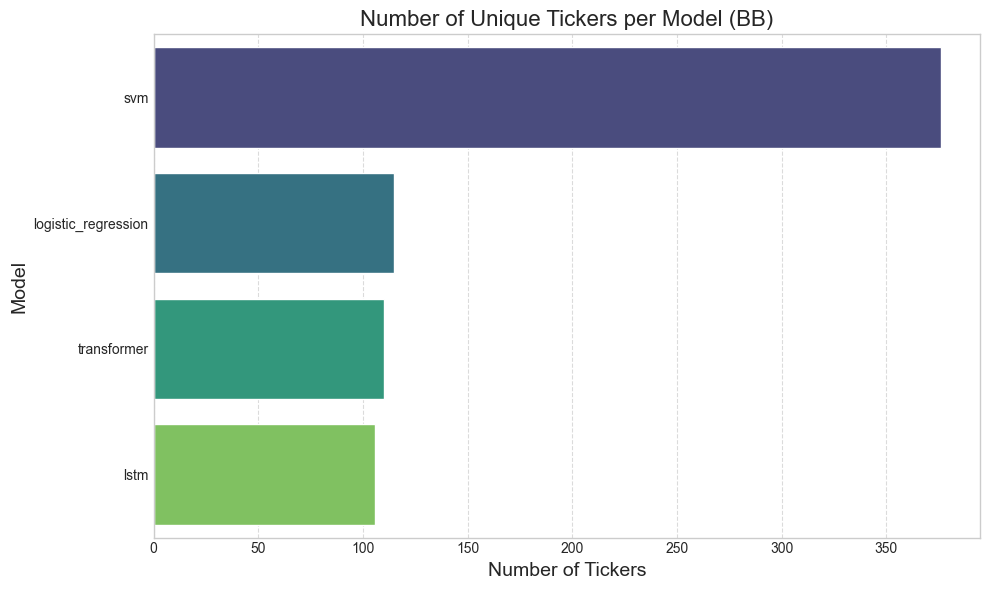

In [8]:
# Plot for BB
plt.figure(figsize=(10, 6))
sns.barplot(x=bb_model_unique_ticker_count.values, y=bb_model_unique_ticker_count.index, palette='viridis')
plt.title('Number of Unique Tickers per Model (BB)', fontsize=16)
plt.xlabel('Number of Tickers', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\A-Q-HNB\AppData\Local\Temp\ipykernel_27092\4201690137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ud_model_unique_ticker_count.values, y=ud_model_unique_ticker_count.index, palette='coolwarm')


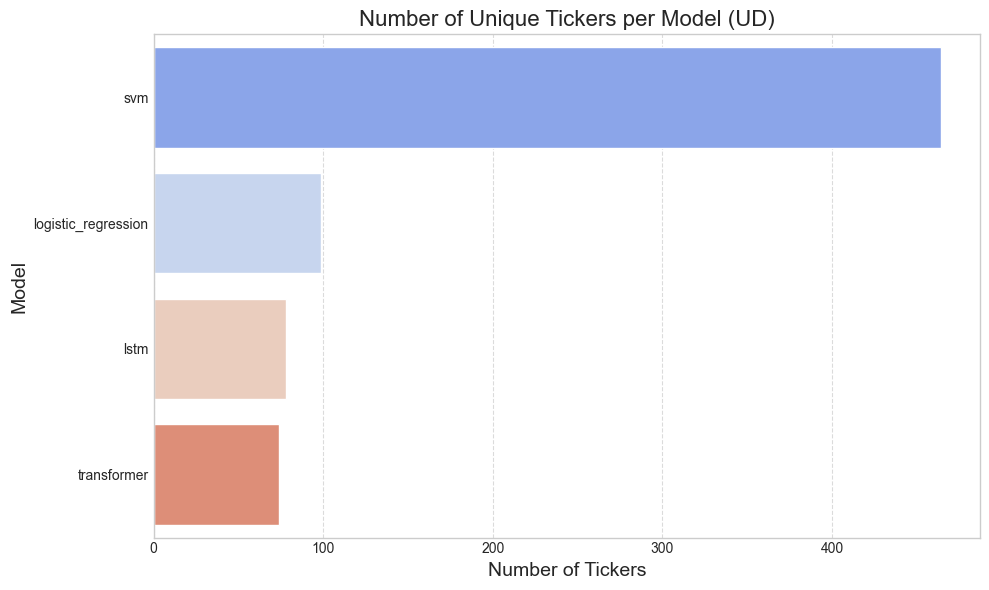

In [9]:
# Plot for UD
plt.figure(figsize=(10, 6))
sns.barplot(x=ud_model_unique_ticker_count.values, y=ud_model_unique_ticker_count.index, palette='coolwarm')
plt.title('Number of Unique Tickers per Model (UD)', fontsize=16)
plt.xlabel('Number of Tickers', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()